##### In this project I am applying PCA to extract important features from Wine dataset that consists of several chemicals in 3 types of wines and then use it for classification. 
##### We are using only Logistic Regression here, we have to classify 3 classes of wines 'customer_segment' and extract the important features 

### Preparing the Dataset

#### Importing the libraries

In [5]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Importing the dataset

In [6]:
dataset = pd.read_csv('Wine1.csv')
wine=dataset

# Select a subset of the features for the purposes of this notebook
wineSub = wine[['Customer_Segment','Alcohol','Malic_Acid','Magnesium','Flavanoids']]

In [7]:
wine.head(5)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
# Encode wine class 1 as itself and all others as 0
wineSub.loc[wineSub['Customer_Segment'] != 1, 'Customer_Segment'] = 0

# Check the prevalence of class 1 within the dataset
print(wineSub.groupby('Customer_Segment').size())

Customer_Segment
0    119
1     59
dtype: int64


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


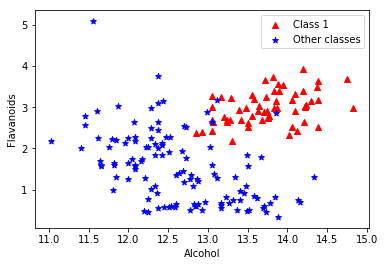

In [9]:
# Select alcohol and flavanoids as candidate variables

X1 = np.array(wineSub[['Alcohol','Flavanoids']])
y1 = np.array(wineSub['Customer_Segment'])

# Note DO NOT RESHAPE y TO HAVE MORE THAN 1 DIMENSION. OTHERWISE THE BELOW INDEXING WON'T WORK
# 
plt.scatter(X1[y1 == 1, 0],X1[y1 == 1, 1],label='Class 1',marker='^',color='red')
plt.scatter(X1[y1 == 0, 0],X1[y1 == 0, 1],label='Other classes',marker='*',color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend(loc='upper right')
plt.show()

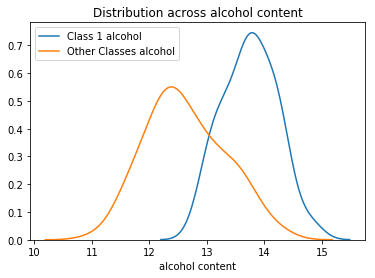

In [10]:
sns.kdeplot(X1[y1 == 1,0], label='Class 1 alcohol')
sns.kdeplot(X1[y1 == 0,0], label='Other Classes alcohol')
plt.title('Distribution across alcohol content')
plt.xlabel('alcohol content')
plt.show()

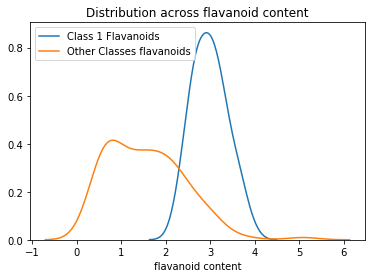

In [11]:
sns.kdeplot(X1[y1 == 1,1], label='Class 1 Flavanoids')
sns.kdeplot(X1[y1 == 0,1], label='Other Classes flavanoids')
plt.title('Distribution across flavanoid content')
plt.xlabel('flavanoid content')
plt.show()

In [12]:
dataset.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


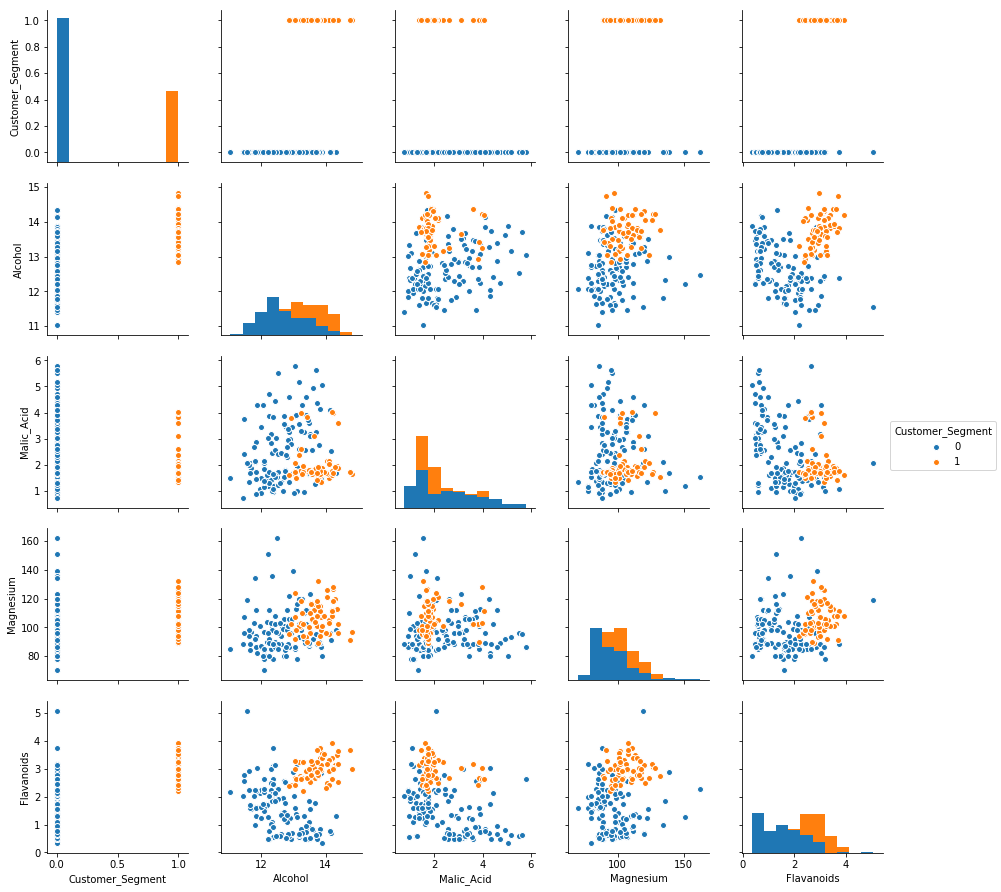

In [13]:


# Plotting the variables against each other
sns.pairplot(wineSub,hue='Customer_Segment')



## Correlation Visualization

In [14]:
corr1 = dataset.corr()
corr1.style.background_gradient()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1,0.0943969,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.0717472,0.0723432,0.64372,-0.328222
Malic_Acid,0.0943969,1,0.164045,0.2885,-0.0545751,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.36871,-0.192011,0.437776
Ash,0.211545,0.164045,1,0.443367,0.286587,0.12898,0.115077,0.18623,0.00965194,0.258887,-0.0746669,0.00391123,0.223626,-0.0496432
Ash_Alcanity,-0.310235,0.2885,0.443367,1,-0.0833331,-0.321113,-0.35137,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.0545751,0.286587,-0.0833331,1,0.214401,0.195784,-0.256294,0.236441,0.19995,0.0553982,0.0660039,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.12898,-0.321113,0.214401,1,0.864564,-0.449935,0.612413,-0.0551364,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.35137,0.195784,0.864564,1,-0.5379,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.18623,0.361922,-0.256294,-0.449935,-0.5379,1,-0.365845,0.139057,-0.26264,-0.50327,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.00965194,-0.197327,0.236441,0.612413,0.652692,-0.365845,1,-0.0252499,0.295544,0.519067,0.330417,-0.49913
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.19995,-0.0551364,-0.172379,0.139057,-0.0252499,1,-0.521813,-0.428815,0.3161,0.265668


## Let's do some Plots

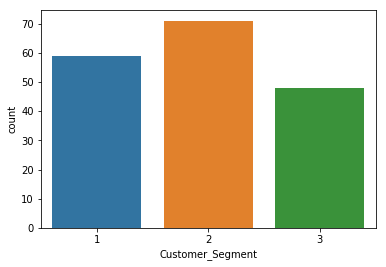

In [15]:
import seaborn as sns

sns.countplot(dataset['Customer_Segment'])

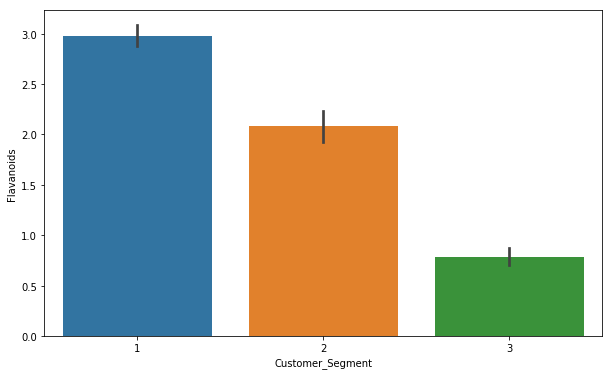

In [16]:
#Here we see that its quite a downing trend in the Flavanoids as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Customer_Segment', y = 'Flavanoids', data = dataset)

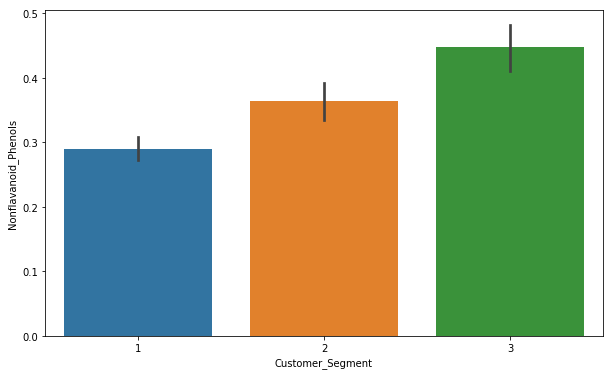

In [17]:
#Here we see that its quite a increasing trend in the Non-Flavanoids as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Customer_Segment', y = 'Nonflavanoid_Phenols', data = dataset)

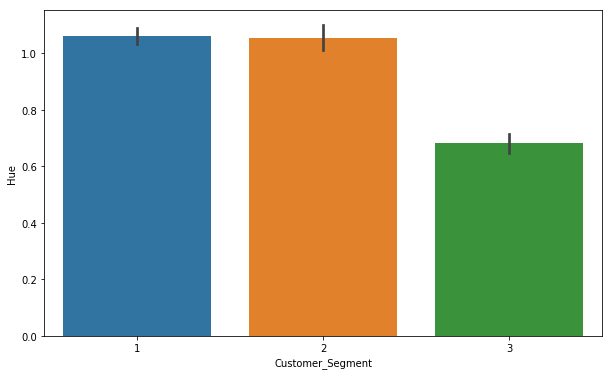

In [18]:
#Here we see that its quite a downing trend in the Hue as we go to different Customer Segments but no effect to type 1 and 2
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Customer_Segment', y = 'Hue', data = dataset)

In [19]:
X = dataset.iloc[:, 0:13].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

In [20]:
X[0:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [21]:
y[0:2]

array([1, 1])

### Feature Engineering

#### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
X[0:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

#### Applying PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [25]:
X[0:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289]])

In [26]:
explained_variance = pca.explained_variance_ratio_
explained_variance*100

array([36.1988481 , 19.20749026])

### Exporting the results

In [27]:
features = pd.DataFrame(X)
features.to_csv('features.csv')
features.head(2)

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393


In [28]:

target = pd.DataFrame(y)
target.to_csv('target.csv')
target[0:2]


,0
0,1
1,1


In [29]:
Xx = features.iloc[:,1:].values
Xx[0:2]

array([[-1.44346263],
       [ 0.33339289]])

In [30]:
yy = target[0].values
yy[0:5]

array([1, 1, 1, 1, 1])

### Splitting the X and y into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)

### Fitting Logistic Regression to the Training set

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the Test set results

In [33]:
y_pred = classifier.predict(X_test)
y_pred[0:5]

array([3, 3, 2, 3, 2])

### Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  1,  8],
       [ 1, 15,  0],
       [ 3,  0,  3]])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.6388888888888888

In [37]:
accuracy_score(y_test, y_pred, normalize=False)

23

### PCA on different variables

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = dataset.iloc[:, 0:11].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

sc = StandardScaler()
X = sc.fit_transform(X)


pca = PCA(n_components = 2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance*100

features = pd.DataFrame(X)
target = pd.DataFrame(y)

Xx = features.iloc[:,1:].values
yy = target[0].values


X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1,  0],
       [ 2, 14,  0],
       [ 4,  1,  1]])

In [39]:
accuracy_score(y_test, y_pred)

0.7777777777777778

## Now trying values Alcohol to 6 (Flavanoids)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = dataset.iloc[:, 0:6].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

sc = StandardScaler()
X = sc.fit_transform(X)


pca = PCA(n_components = 2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance*100

features = pd.DataFrame(X)
target = pd.DataFrame(y)

Xx = features.iloc[:,1:].values
yy = target[0].values


X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred) ##Accuracy has decreased here 



0.5555555555555556

In [41]:


X = dataset.iloc[:, 1:11].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

sc = StandardScaler()
X = sc.fit_transform(X)


pca = PCA(n_components = 2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance*100

features = pd.DataFrame(X)
target = pd.DataFrame(y)

Xx = features.iloc[:,1:].values
yy = target[0].values


X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6944444444444444

In [42]:

X = dataset.iloc[:, 0:13:2].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

sc = StandardScaler()
X = sc.fit_transform(X)


pca = PCA(n_components = 2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance*100

features = pd.DataFrame(X)
target = pd.DataFrame(y)

Xx = features.iloc[:,1:].values
yy = target[0].values


X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7222222222222222

In [43]:

X = dataset.iloc[:, 1:12:2].values  #Explanatory variables
y = dataset.iloc[:, 13].values  #Target variable

sc = StandardScaler()
X = sc.fit_transform(X)


pca = PCA(n_components = 2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance*100

features = pd.DataFrame(X)
target = pd.DataFrame(y)

Xx = features.iloc[:,1:].values
yy = target[0].values


X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6666666666666666

# Conclusion

##### Trying on different variables of chemicals in PCA we got different types of accuracies. 
we got highest accuracy when we used variables 0 to 11
After that second highest accuracy was with variables 0 to 12, leaving one variable out after each

PCA is used when we want the accuracy of our model to improve and check which variables are import. 